In [1]:
!pip install pandas
import pandas as pd
!pip install scikit-learn
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install xlrd
!pip install openpyxl



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
df = pd.read_csv(
    '/Users/mitchellmarabella/Downloads/phytochemicals_full_features.xls',
)

df.shape

(58857, 2271)

In [4]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Columns: 2271 entries, CID to FP_2047
dtypes: float64(109), int64(2161), object(1)
memory usage: 1019.8+ MB


/Users/mitchellmarabella/Desktop/Current School/MBBE 447/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


LogP                   566
BCUT2D_MWHI            131
BCUT2D_MRHI            131
BCUT2D_LOGPHI          131
BCUT2D_CHGLO           131
BCUT2D_CHGHI           131
BCUT2D_MWLOW           131
BCUT2D_MRLOW           131
BCUT2D_LOGPLOW         131
MaxAbsPartialCharge      7
MaxPartialCharge         7
MinPartialCharge         7
MinAbsPartialCharge      7
SPS                      1
FP_1292                  0
FP_1306                  0
FP_1305                  0
FP_1304                  0
FP_1303                  0
FP_1302                  0
dtype: int64

In [5]:
null_percent = df.isnull().mean()
df = df.loc[:, null_percent < 0.5]


In [6]:
non_numeric = df.select_dtypes(include=['object']).columns.tolist()
print(non_numeric)


['SMILES']


In [7]:
print(df.columns.tolist())


['CID', 'SMILES', 'MolWt_x', 'LogP', 'HDonors', 'HAcceptors', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt_y', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR

In [8]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Columns: 2271 entries, CID to FP_2047
dtypes: float64(109), int64(2161), object(1)
memory usage: 1019.8+ MB


,CID,SMILES,MolWt_x,LogP,HDonors,HAcceptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
1,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
2,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
3,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0
4,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.32456,11.32456,0.372593,0.372593,...,0,0,0,0,0,0,0,0,0,0


In [9]:

# Step 1: Identify toxicity target columns
tox_targets = [col for col in df.columns if col.startswith('NR-') or col.startswith('SR-')]
print(f"Toxicity targets found: {tox_targets}")

# Step 2: Drop rows with all toxicity targets missing
df = df.dropna(subset=tox_targets, how='all')
print(f"After dropping rows with all targets missing: {df.shape}")

# Step 3: Drop columns with >20% missing values (optional, depending on missingness)
df = df.dropna(axis=1, thresh=0.8 * len(df))
print(f"After dropping sparse columns: {df.shape}")

# Step 4: Define non-feature columns
non_feature_cols = ['CID', 'SMILES'] + tox_targets

# Step 5: Select feature columns
feature_cols = [col for col in df.columns if col not in non_feature_cols]

# Optional: fill missing values in features
df[feature_cols] = df[feature_cols].fillna(df[feature_cols].mean())

# Optional: fill missing labels with 0 (or use multilabel masking logic during training)
df[tox_targets] = df[tox_targets].fillna(0)

# Step 6: Prepare final feature matrix X and label matrix Y
X = df[feature_cols]
Y = df[tox_targets]

print(f"Final shape of feature matrix X: {X.shape}")
print(f"Final shape of label matrix Y: {Y.shape}")


Toxicity targets found: []
After dropping rows with all targets missing: (0, 2271)
After dropping sparse columns: (0, 2271)
Final shape of feature matrix X: (0, 2269)
Final shape of label matrix Y: (0, 0)


In [10]:
# List columns that look like label targets
possible_targets = [col for col in df.columns if df[col].nunique() <= 3 and df[col].dtype != 'object']
print(possible_targets)


['CID', 'MolWt_x', 'LogP', 'HDonors', 'HAcceptors', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt_y', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'S

# Model Creation using tox21 dataset

In [11]:
# load the tox21 dataset

!pip install rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools

# Load the SDF file
sdf_file = "tox21_10k_data_all.sdf"
suppl = Chem.SDMolSupplier(sdf_file)

# Filter out None values (invalid molecules)
mols = [mol for mol in suppl if mol is not None]

# Convert to pandas DataFrame with molecule objects
df_tox21 = PandasTools.LoadSDF(sdf_file, removeHs=False)
df_tox21 = df_tox21[df_tox21.ROMol.notnull()]  # Drop rows with invalid molecules

# Peek at the data
df_tox21.head()



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


[13:13:39] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[13:13:39] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[13:13:39] ERROR: Could not sanitize molecule ending on line 21572
[13:13:39] ERROR: Explicit valence for atom # 3 Cl, 1, is greater than permitted
[13:13:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[13:13:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[13:13:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[13:13:39] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[13:13:39] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[13:13:39] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[13:13:39] ERROR: Could not sanitize molecule ending on line 446665
[13:13:39] ERROR: Explicit valence for atom # 

,Formula,FW,DSSTox_CID,SR-HSE,ID,ROMol,NR-AR,SR-ARE,NR-Aromatase,NR-ER-LBD,NR-AhR,SR-MMP,NR-ER,NR-PPAR-gamma,SR-p53,SR-ATAD5,NR-AR-LBD
0,C27H25ClN6,468.9806 (35.4535+224.2805+209.2465),25848,0,NCGC00178831-03,<rdkit.Chem.rdchem.Mol object at 0x3067d97e0>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C20H6Br4Na2O5,691.8542 (645.8757+22.9892+22.9892),5234,0,NCGC00166114-03,<rdkit.Chem.rdchem.Mol object at 0x3067d9850>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C47H83NO17,934.1584 (916.1205+18.0379),28909,0,NCGC00263563-01,<rdkit.Chem.rdchem.Mol object at 0x3067d98c0>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C52H54N4O12,927.0048 (329.4575+89.0275+89.0275+329.4575+90...,5513,1,NCGC00013058-02,<rdkit.Chem.rdchem.Mol object at 0x3067d9930>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C66H87N17O14,1342.5025 (1282.4505+60.0520),26683,NaN,NCGC00167516-01,<rdkit.Chem.rdchem.Mol object at 0x3067d99a0>,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_tox21.shape
df_tox21.info()
df_tox21.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11761 entries, 0 to 11763
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Formula        11761 non-null  object
 1   FW             11761 non-null  object
 2   DSSTox_CID     11761 non-null  object
 3   SR-HSE         8148 non-null   object
 4   ID             11761 non-null  object
 5   ROMol          11761 non-null  object
 6   NR-AR          9360 non-null   object
 7   SR-ARE         7166 non-null   object
 8   NR-Aromatase   7224 non-null   object
 9   NR-ER-LBD      8751 non-null   object
 10  NR-AhR         8167 non-null   object
 11  SR-MMP         7319 non-null   object
 12  NR-ER          7695 non-null   object
 13  NR-PPAR-gamma  8182 non-null   object
 14  SR-p53         8632 non-null   object
 15  SR-ATAD5       9089 non-null   object
 16  NR-AR-LBD      8597 non-null   object
dtypes: object(17)
memory usage: 1.6+ MB


,Formula,FW,DSSTox_CID,SR-HSE,ID,ROMol,NR-AR,SR-ARE,NR-Aromatase,NR-ER-LBD,NR-AhR,SR-MMP,NR-ER,NR-PPAR-gamma,SR-p53,SR-ATAD5,NR-AR-LBD
count,11761,11761,11761,8148,11761,11761,9360,7166,7224,8751,8167,7319,7695,8182,8632,9089,8597
unique,5854,5911,8041,2,11761,11761,2,2,2,2,2,2,2,2,2,2,2
top,C10H18O,154.2493,1869,0,NCGC00178831-03,<rdkit.Chem.rdchem.Mol object at 0x3067d97e0>,0,0,0,0,0,0,0,0,0,0,0
freq,32,32,6,7720,1,1,8980,6069,6864,8305,7217,6177,6758,7960,8095,8751,8294


In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np

# Get list of all RDKit descriptor names
descriptor_names = [desc[0] for desc in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def compute_descriptors_and_fingerprint(mol):
    if mol is None:
        return None
    try:
        # Compute molecular descriptors
        descriptors = list(calc.CalcDescriptors(mol))
        
        # Compute Morgan fingerprint
        fp = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fp_array = np.array(fp)
        
        return descriptors + fp_array.tolist()
    except Exception as e:
        print(f"Error processing molecule: {e}")
        return None


In [14]:
import pandas as pd
from rdkit import Chem

# Load the molecules from SDF
suppl = Chem.SDMolSupplier('tox21_10k_data_all.sdf')
mols = [mol for mol in suppl if mol is not None]

# Initialize lists
features = []
labels = []

# Choose target (example: 'SR-MMP')
target = 'SR-MMP'

# Extract features and labels
for mol in mols:
    feature_vector = compute_descriptors_and_fingerprint(mol)
    if feature_vector is None:
        continue
    try:
        label = mol.GetProp(target)
        if label == "":
            continue
        features.append(feature_vector)
        labels.append(int(label))
    except:
        continue

# Create feature matrix and label vector
X = pd.DataFrame(features)
y = pd.Series(labels, name=target)

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Label vector shape: {y.shape}")


[13:13:41] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[13:13:41] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[13:13:41] ERROR: Could not sanitize molecule ending on line 21572
[13:13:41] ERROR: Explicit valence for atom # 3 Cl, 1, is greater than permitted
[13:13:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[13:13:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 1 ignored.
[13:13:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[13:13:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 6 ignored.
[13:13:41] The 2 defining bonds for an atropisomer are co-planar - atoms are: 4 10
[13:13:42] Explicit valence for atom # 3 Cl, 1, is greater than permitted
[13:13:42] ERROR: Could not sanitize molecule ending on line 446665
[13:13:42] ERROR: Explicit valence for atom # 

✅ Feature matrix shape: (7319, 2265)
✅ Label vector shape: (7319,)


In [15]:
# Get descriptor and fingerprint column names
from rdkit.Chem import Descriptors

descriptor_names = [desc[0] for desc in Descriptors._descList]
fp_cols = [f"FP_{i}" for i in range(2048)]  # 2048 if using Morgan fingerprints
all_cols = descriptor_names + fp_cols

# Re-assign to X if needed
X.columns = all_cols

In [16]:
X.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,13.446839,13.446839,0.025204,-4.587558,0.323460,16.444444,523.973,496.757,523.170133,192,...,0,0,0,0,0,0,0,0,0,0
1,9.553611,9.553611,0.557870,-1.257037,0.552422,24.678571,393.568,354.256,393.287909,160,...,0,0,0,0,0,0,0,0,0,0
2,2.361836,2.361836,0.000000,0.000000,0.382270,11.260870,339.995,301.691,339.269278,134,...,0,0,0,0,0,0,0,0,0,0
3,10.568199,10.568199,0.128494,-0.269721,0.617691,12.160000,330.471,304.263,330.198365,128,...,0,0,0,0,0,0,0,0,0,0
4,2.365434,2.365434,0.000000,-0.696606,0.065697,11.647059,563.774,495.230,562.424201,208,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import GridSearchCV

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

In [18]:
# do the train test split (75% of data for training)
X_train, X_test, y_train, y_test = train_test_split(X, y) 

# train RFC 
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# # testing hyperparameteres for RFC
# param_grid ={
#     'max_samples': [0.25, 0.5, 0.75, 1],
#     'max_features': [0.25, 0.5, 0.75, 1],
#     'n_estimators': [50, 100, 200, 1000],
#     'max_depth': [4, 8, 10]
# }
# grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True) 
# grid_search.fit(X_train, y_train)

# optimal_params = grid_search.best_params_

# print(optimal_params)

In [20]:
optimal_params = {'max_depth': 10, 'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 200}


In [21]:
optimal_clf = RandomForestClassifier(**optimal_params)

optimal_clf.fit(X_train, y_train)

best_y_pred = optimal_clf.predict(X_test) 
final_accuracy = accuracy_score(y_test, best_y_pred) 
final_accuracy

0.9158469945355191

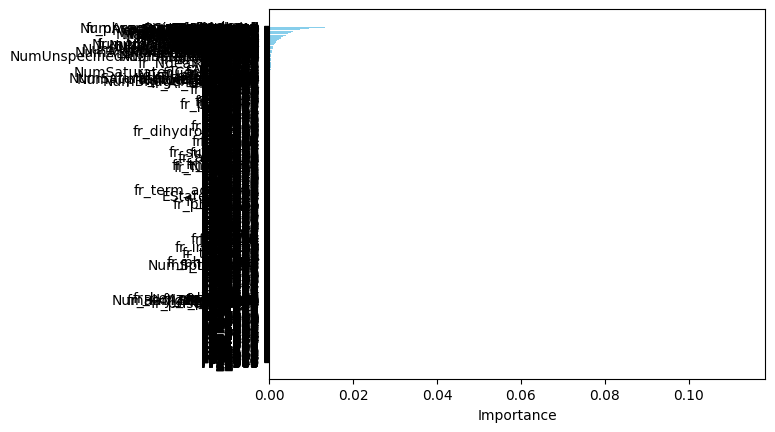

In [22]:
# find the feature importances from the final model

importances = optimal_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot the feature importances as a bar plot
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show() 

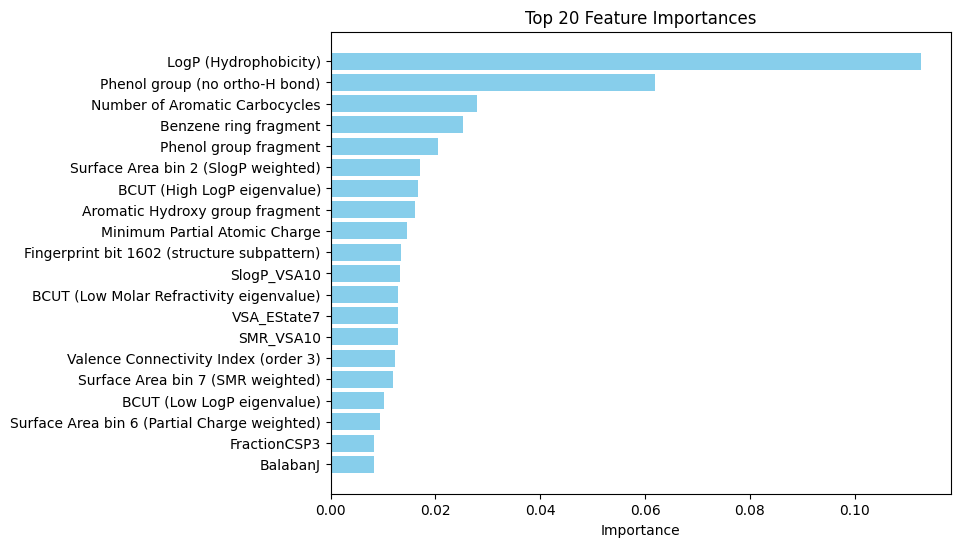

In [23]:
# Create a mapping from raw names to friendly labels
feature_mapping = {
    'MolLogP': 'LogP (Hydrophobicity)',
    'fr_phenol_noOrthoHbond': 'Phenol group (no ortho-H bond)',
    'fr_benzene': 'Benzene ring fragment',
    'NumAromaticCarbocycles': 'Number of Aromatic Carbocycles',
    'fr_phenol': 'Phenol group fragment',
    'SMR_VSA7': 'Surface Area bin 7 (SMR weighted)',
    'FP_1602': 'Fingerprint bit 1602 (structure subpattern)',
    'fr_Ar_OH': 'Aromatic Hydroxy group fragment',
    'BCUT2D_LOGPHI': 'BCUT (High LogP eigenvalue)',
    'SlogP_VSA2': 'Surface Area bin 2 (SlogP weighted)',
    'MinPartialCharge': 'Minimum Partial Atomic Charge',
    'PEOE_VSA6': 'Surface Area bin 6 (Partial Charge weighted)',
    'BCUT2D_LOGPLOW': 'BCUT (Low LogP eigenvalue)',
    'Chi2v': 'Valence Connectivity Index (order 2)',
    'BCUT2D_MRLOW': 'BCUT (Low Molar Refractivity eigenvalue)',
    'SlogP_VSA6': 'Surface Area bin 6 (SlogP weighted)',
    'VSA_EState3': 'VSA Electrotopological State (bin 3)',
    'Chi3v': 'Valence Connectivity Index (order 3)',
    'BertzCT': 'Bertz Complexity Index',
    'MaxAbsPartialCharge': 'Maximum Absolute Partial Charge'
}

# Apply mapping
feature_importance_df['Feature_Clean'] = feature_importance_df['Feature'].map(feature_mapping).fillna(feature_importance_df['Feature'])

# Plot again
import matplotlib.pyplot as plt

top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature_Clean'], top_features['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


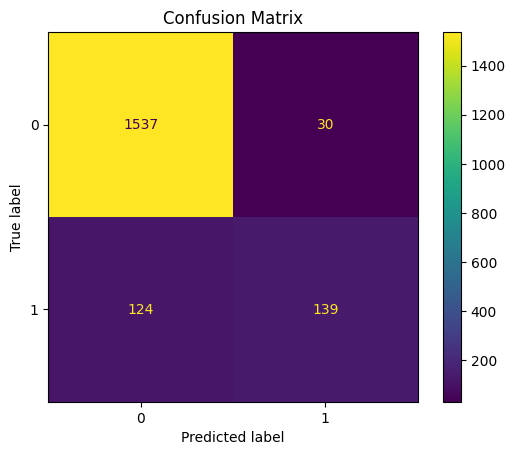

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = optimal_clf.predict(X_test)
cm = confusion_matrix(y_test, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_test, best_y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1567
           1       0.82      0.53      0.64       263

    accuracy                           0.92      1830
   macro avg       0.87      0.75      0.80      1830
weighted avg       0.91      0.92      0.91      1830



In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Get probability predictions
y_valid_proba = optimal_clf.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.4  # or try 0.3
y_valid_pred_thresh = (y_valid_proba >= threshold).astype(int)

# Evaluate
print(confusion_matrix(y_test, y_valid_pred_thresh))
print(classification_report(y_test, y_valid_pred_thresh))


[[1517   50]
 [ 108  155]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1567
           1       0.76      0.59      0.66       263

    accuracy                           0.91      1830
   macro avg       0.84      0.78      0.81      1830
weighted avg       0.91      0.91      0.91      1830



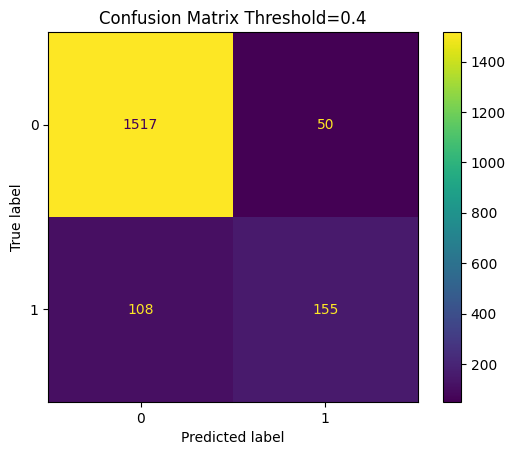

In [27]:

cm_thresh = confusion_matrix(y_test, y_valid_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_thresh)
disp.plot()
plt.title("Confusion Matrix Threshold=0.4")
plt.show()

In [28]:

# Get probability predictions
y_valid_proba = optimal_clf.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold3 = 0.3  # or try 0.3
y_valid_pred_thresh3 = (y_valid_proba >= threshold3).astype(int)

# Evaluate
print(confusion_matrix(y_test, y_valid_pred_thresh3))
print(classification_report(y_test, y_valid_pred_thresh3))

[[1482   85]
 [  85  178]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1567
           1       0.68      0.68      0.68       263

    accuracy                           0.91      1830
   macro avg       0.81      0.81      0.81      1830
weighted avg       0.91      0.91      0.91      1830



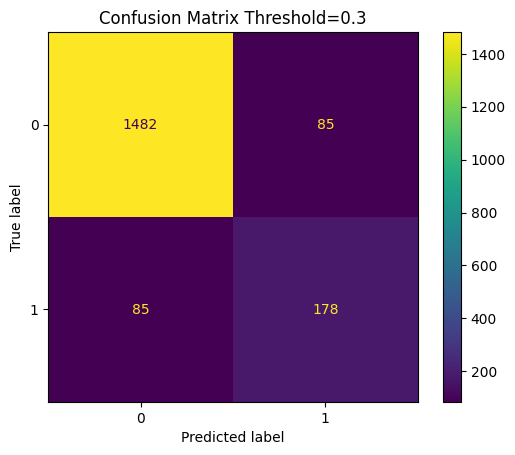

In [29]:
cm_thresh3 = confusion_matrix(y_test, y_valid_pred_thresh3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_thresh3)
disp.plot()
plt.title("Confusion Matrix Threshold=0.3")
plt.show()

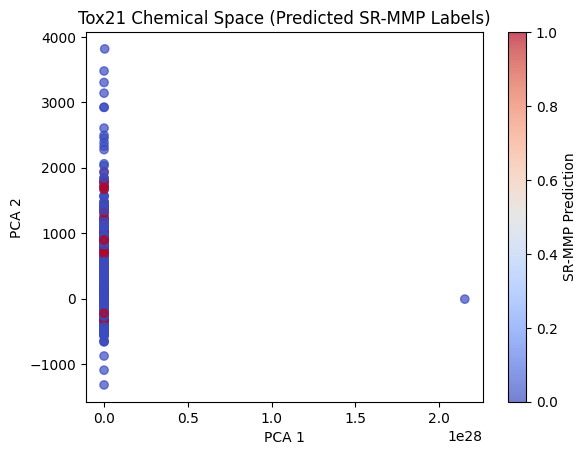

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on the same feature set used for prediction
X_reduced = PCA(n_components=2).fit_transform(X_test)

# Plot using best_y_pred, which should match X_valid.shape[0]
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=best_y_pred, cmap='coolwarm', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Tox21 Chemical Space (Predicted SR-MMP Labels)")
plt.colorbar(label='SR-MMP Prediction')
plt.show()


# Phytochemical Dataset Application

In [31]:
# extract molecular discriptors and fingerprints
from rdkit.Chem import Descriptors 
from rdkit.ML.Descriptors import MoleculeDescriptors 
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect 

In [32]:
# Load your phytochemical dataset
df_phyto = pd.read_csv("/Users/mitchellmarabella/Downloads/phytochemicals_full_features.xls")
print(df_phyto.shape)
df_phyto.head()

df_phyto_dedup = df_phyto.drop_duplicates()

(58857, 2271)


In [33]:
# Get the feature names used during training
model_features = X.columns.tolist()  # X is from the Tox21 training process

# Make sure all required features exist in the phytochemical dataset
missing = [feat for feat in model_features if feat not in df_phyto_dedup.columns]
print(f"Missing features: {missing}")


Missing features: ['MolWt']


In [34]:
[col for col in df_phyto_dedup.columns if 'MolWt' in col]

['MolWt_x', 'MolWt_y', 'HeavyAtomMolWt', 'ExactMolWt']

In [35]:
df_phyto_dedup['MolWt'] = df_phyto_dedup['MolWt_x']

X_phyto = df_phyto_dedup[model_features]
X_phyto = X_phyto.fillna(0)


/var/folders/t_/wpg24vc52s93dg1hy59mxsfw0000gn/T/ipykernel_27846/3587668131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phyto_dedup['MolWt'] = df_phyto_dedup['MolWt_x']


In [36]:
import numpy as np

# Step 1: Replace any infinite values with NaN
X_phyto = X_phyto.replace([np.inf, -np.inf], np.nan)

# Step 2: Fill all NaNs with column means (or zeros if preferred)
X_phyto = X_phyto.fillna(0)

# Step 3: Optional — clip any extreme values to a safe range
X_phyto = X_phyto.clip(lower=-1e6, upper=1e6)


In [37]:


# Predict probability of SR-MMP activity
y_phyto_proba = optimal_clf.predict_proba(X_phyto)[:, 1]

# Predict binary SR-MMP label (optional, e.g., 1 = toxic, 0 = non-toxic)
y_phyto_pred = optimal_clf.predict(X_phyto)

# Add results back to your dataframe
df_phyto_dedup['SR-MMP_Probability'] = y_phyto_proba
df_phyto_dedup['SR-MMP_Predicted'] = y_phyto_pred

/var/folders/t_/wpg24vc52s93dg1hy59mxsfw0000gn/T/ipykernel_27846/2885934870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phyto_dedup['SR-MMP_Probability'] = y_phyto_proba
/var/folders/t_/wpg24vc52s93dg1hy59mxsfw0000gn/T/ipykernel_27846/2885934870.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phyto_dedup['SR-MMP_Predicted'] = y_phyto_pred


## Analyzing Tox21 model applied to Phytochemicals

In [38]:
[col for col in df_phyto_dedup.columns if 'Chem' in col]

[]

In [39]:
top_toxic = df_phyto_dedup.sort_values(by='SR-MMP_Probability', ascending=False).head(10)
top_toxic[['CID', 'SR-MMP_Probability', 'SR-MMP_Predicted']]

,CID,SR-MMP_Probability,SR-MMP_Predicted
37948,448537,0.987071,1
44527,3598,0.983527,1
35516,1548910,0.977996,1
35524,445154,0.977996,1
24359,5280443,0.974258,1
43212,5280961,0.974049,1
48675,5280863,0.971763,1
55600,5281576,0.962851,1
37050,28620,0.959725,1
55742,5280520,0.959544,1


In [40]:
print("Total rows:", len(df_phyto))
print("Unique CIDs:", df_phyto['CID'].nunique())

Total rows: 58857
Unique CIDs: 9257


In [41]:
len(df_phyto_dedup)

9257

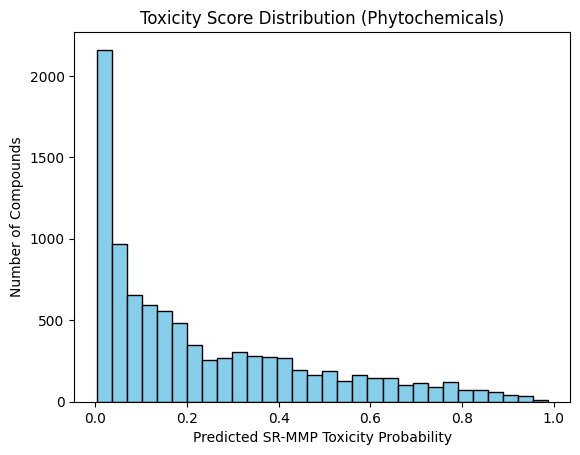

In [42]:
import matplotlib.pyplot as plt

plt.hist(df_phyto_dedup['SR-MMP_Probability'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Predicted SR-MMP Toxicity Probability")
plt.ylabel("Number of Compounds")
plt.title("Toxicity Score Distribution (Phytochemicals)")
plt.show()


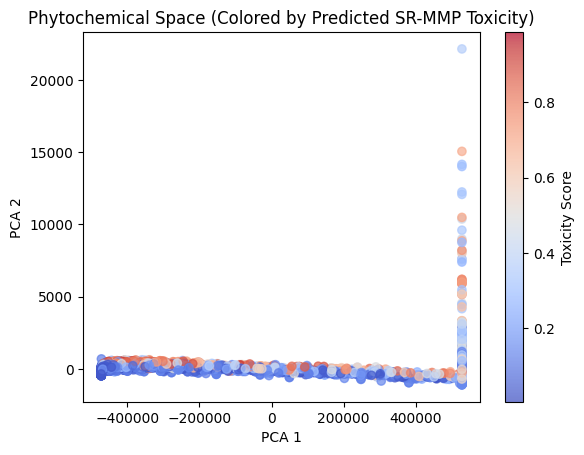

In [43]:
from sklearn.decomposition import PCA

X_plot = X_phyto.copy()  # already cleaned
X_pca = PCA(n_components=2).fit_transform(X_plot)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_phyto_dedup['SR-MMP_Probability'], cmap='coolwarm', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Phytochemical Space (Colored by Predicted SR-MMP Toxicity)")
plt.colorbar(label="Toxicity Score")
plt.show()

In [44]:
df_phyto_dedup['SR-MMP_Predicted'].value_counts(normalize=True).map("{:.2%}".format)

SR-MMP_Predicted
0    84.02%
1    15.98%
Name: proportion, dtype: object

In [45]:
# Count how many compounds exceed the threshold
count_above_0_3 = (df_phyto_dedup['SR-MMP_Probability'] > 0.3).sum()

# Total number of compounds
total = len(df_phyto_dedup)

# Calculate percentage
percentage = (count_above_0_3 / total) * 100
print(f"Percentage of compounds with toxicity probability > 0.3: {percentage:.2f}%")

Percentage of compounds with toxicity probability > 0.3: 32.09%


^^^ Above shows %  toxic 

In [46]:
# Filter for toxic compounds
toxic_compounds = df_phyto_dedup[df_phyto_dedup['SR-MMP_Predicted'] == 1]

# Display just CIDs
toxic_cids = toxic_compounds['CID']

print(toxic_cids)



289         196402
2221        442027
2776         73067
2784        336327
5309         73399
           ...    
58838        95168
58843        13808
58844    156582339
58845        31161
58856     71768102
Name: CID, Length: 1479, dtype: int64


In [47]:
# !pip install requests
# !pip install time
# import requests
# import time

# def get_compound_name(cid):
#     try:
#         url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/IUPACName/JSON"
#         r = requests.get(url)
#         r.raise_for_status()
#         name = r.json()['PropertyTable']['Properties'][0]['IUPACName']
#         return name
#     except:
#         return None

# # Example: run on your predicted toxic CIDs
# toxic_cids = df_phyto[df_phyto['SR-MMP_Predicted'] == 1]['CID'].unique()
# cid_name_map = {}

# for i, cid in enumerate(toxic_cids):
#     name = get_compound_name(cid)
#     cid_name_map[cid] = name
#     if i % 10 == 0:
#         time.sleep(1)  # be nice to the API

# # Convert to DataFrame
# import pandas as pd
# cid_names_df = pd.DataFrame(list(cid_name_map.items()), columns=["CID", "IUPAC_Name"])

# # Save or display
# cid_names_df.to_csv("toxic_cids_with_names.csv", index=False)
# cid_names_df.head()

In [48]:

toxic_compounds.sort_values(ascending=False, by='SR-MMP_Probability').head(10)


,CID,SMILES,MolWt_x,LogP,HDonors,HAcceptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,MolWt,SR-MMP_Probability,SR-MMP_Predicted
37948,448537,CCC(=C(CC)C1=CC=C(C=C1)O)C2=CC=C(C=C2)O,268.30,5.1,2,2,9.410680,9.410680,0.284153,0.284153,...,0,0,0,0,0,0,0,268.30,0.987071,1
44527,3598,C1=C(C(=C(C(=C1Cl)Cl)CC2=C(C(=CC(=C2Cl)Cl)Cl)O...,406.90,7.5,2,2,10.018815,10.018815,0.030683,-0.252193,...,0,0,0,0,0,0,0,406.90,0.983527,1
35524,445154,C1=CC(=CC=C1C=CC2=CC(=CC(=C2)O)O)O,228.24,3.1,3,3,9.300534,9.300534,0.023478,0.023478,...,0,0,0,0,0,0,0,228.24,0.977996,1
35516,1548910,C1=CC(=CC=C1C=CC2=CC(=CC(=C2)O)O)O,228.24,3.1,3,3,9.300534,9.300534,0.023478,0.023478,...,0,0,0,0,0,0,0,228.24,0.977996,1
24359,5280443,C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O,270.24,1.7,3,5,12.020910,12.020910,0.018823,-0.410347,...,0,0,0,0,0,0,0,270.24,0.974258,1
43212,5280961,C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O,270.24,2.7,3,5,12.381821,12.381821,0.007755,-0.407926,...,0,0,0,0,0,0,0,270.24,0.974049,1
48675,5280863,C1=CC(=CC=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O,286.24,1.9,4,6,12.120447,12.120447,0.024690,-0.808495,...,0,0,0,0,0,0,0,286.24,0.971763,1
55600,5281576,CC1CCCC(=O)CCCC=CC2=C(C(=CC(=C2)O)O)C(=O)O1,318.40,3.6,2,5,12.317533,12.317533,0.054663,-0.626819,...,0,0,0,0,0,0,0,318.40,0.962851,1
37050,28620,CC1C(C(CC(O1)OC2CCC3(C(C2)CCC4C3CC(C5(C4(CCC5C...,943.10,-0.3,9,19,12.615301,12.615301,0.018783,-1.649208,...,0,0,0,0,0,0,0,943.10,0.959725,1
55742,5280520,C1=CC(=C(C=C1O)O)C2=COC3=C(C2=O)C=CC(=C3)O,270.24,2.1,3,5,12.362099,12.362099,0.000815,-0.326630,...,1,0,0,0,0,0,0,270.24,0.959544,1


In [49]:
# Set your toxicity threshold
toxicity_threshold = 0.3

# Filter for toxic compounds
toxic_compounds = df_phyto_dedup[df_phyto_dedup['SR-MMP_Probability'] > toxicity_threshold]

# # Save to CSV
# toxic_compounds.to_csv("toxic_phytochemicals_above_0.3.csv", index=False)

# print(f"✅ Saved {len(toxic_compounds)} toxic compounds to 'toxic_phytochemicals_above_0.3.csv'")

In [50]:
# # Merge toxic CIDs and names with full prediction results
# merged_df = pd.merge(
#     df_phyto[['CID', 'SR-MMP_Probability', 'SR-MMP_Predicted']],
#     cid_names_df,
#     on='CID',
#     how='inner'  # only include rows that matched
# )

# # Optional: reorder or filter
# merged_df = merged_df[['CID', 'IUPAC_Name', 'SR-MMP_Probability', 'SR-MMP_Predicted']]

# # Preview
# merged_df.head()

In [51]:
# merged_df.to_csv("toxic_phytochemicals_with_names.csv", index=False)

In [ ]:
# Define your threshold


# Create new binary prediction column based on that threshold
df_phyto_dedup['SR-MMP_Predicted_thresh_0.3'] = (df_phyto_dedup['SR-MMP_Probability'] >= toxicity_threshold).astype(int)



             CID                                             SMILES   MolWt_x  \
0          91456                               CC1C2CC2(CC1=O)C(C)C   152.230   
8         261491                               CC1C2CC2(CC1=O)C(C)C   152.230   
16       6452086                      CC1=C2CC(CCC2(CCC1=O)C)C(=C)C   218.330   
24      10632629                      CC1=C2CC(CCC2(CCC1=O)C)C(=C)C   218.330   
32         82227                                  CC1=CCC2CC1C2(C)C   136.230   
...          ...                                                ...       ...   
58852  133065518     CC=C(C)C(=O)OC1CCC2CC3C(=C(C(=O)O3)C)CC2(C1C)C   332.400   
58853     441938  CC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3C(OC(C(C3O)O)O...  1381.500   
58854       1061                                [O-]P(=O)([O-])[O-]    94.971   
58855     193552                  COC1CCN2C(C1)C34CC2C=CC3=CC(=O)O4   247.290   
58856   71768102  CC1=C(C=C(C(=C1C)O)CC=C(C)CCCC(C)CCCC(C)CCCC(C...   416.700   

       LogP  HDonors  HAcce

/var/folders/t_/wpg24vc52s93dg1hy59mxsfw0000gn/T/ipykernel_27846/672180301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phyto_dedup['SR-MMP_Predicted_thresh_0.3'] = (df_phyto_dedup['SR-MMP_Probability'] >= toxicity_threshold).astype(int)


In [54]:

df_phyto_dedup.head(5)

,CID,SMILES,MolWt_x,LogP,HDonors,HAcceptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,MolWt,SR-MMP_Probability,SR-MMP_Predicted,SR-MMP_Predicted_thresh_0.3
0,91456,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.324560,11.324560,0.372593,0.372593,...,0,0,0,0,0,0,152.23,0.019632,0,0
8,261491,CC1C2CC2(CC1=O)C(C)C,152.23,2.3,0,1,11.324560,11.324560,0.372593,0.372593,...,0,0,0,0,0,0,152.23,0.019632,0,0
16,6452086,CC1=C2CC(CCC2(CCC1=O)C)C(=C)C,218.33,3.8,0,1,11.787408,11.787408,0.309468,0.309468,...,0,0,1,0,0,0,218.33,0.170714,0,0
24,10632629,CC1=C2CC(CCC2(CCC1=O)C)C(=C)C,218.33,3.8,0,1,11.787408,11.787408,0.309468,0.309468,...,0,0,1,0,0,0,218.33,0.170714,0,0
32,82227,CC1=CCC2CC1C2(C)C,136.23,2.8,0,0,2.434606,2.434606,0.637731,0.637731,...,0,0,0,0,0,0,136.23,0.022602,0,0


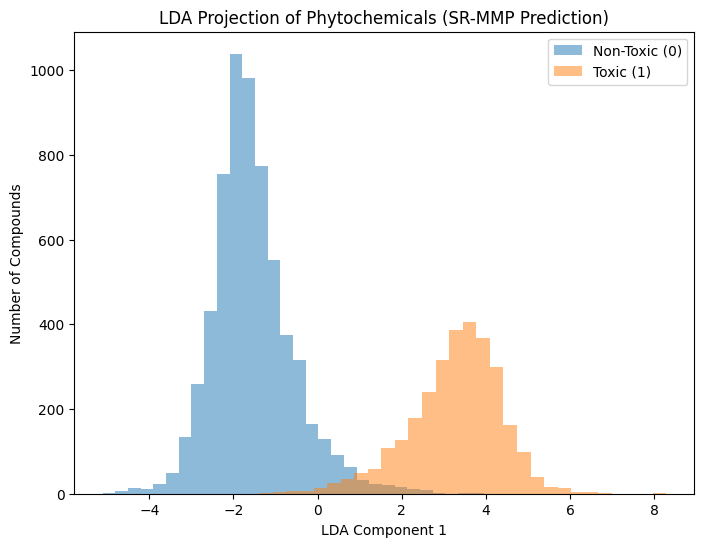

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Step 1: Set up data
X_plot = X_phyto.copy()
y_plot = df_phyto_dedup['SR-MMP_Predicted_thresh_0.3']

# Step 2: Train and transform with LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # 1D separation
X_lda = lda.fit_transform(X_plot, y_plot)

# Step 3: Plot
plt.figure(figsize=(8,6))
plt.hist(X_lda[y_plot == 0], bins=30, alpha=0.5, label='Non-Toxic (0)')
plt.hist(X_lda[y_plot == 1], bins=30, alpha=0.5, label='Toxic (1)')
plt.xlabel("LDA Component 1")
plt.ylabel("Number of Compounds")
plt.title("LDA Projection of Phytochemicals (SR-MMP Prediction)")
plt.legend()
plt.show()


In [58]:
df_phyto_dedup.head(5)
df_phyto_dedup.tail(5)


,CID,SMILES,MolWt_x,LogP,HDonors,HAcceptors,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,MolWt,SR-MMP_Probability,SR-MMP_Predicted,SR-MMP_Predicted_thresh_0.3
58852,133065518,CC=C(C)C(=O)OC1CCC2CC3C(=C(C(=O)O3)C)CC2(C1C)C,332.400,3.9,0,4,12.165376,12.165376,0.021163,-0.208463,...,0,0,0,0,0,0,332.400,0.132607,0,0
58853,441938,CC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3C(OC(C(C3O)O)O...,1381.500,-2.2,18,31,12.952480,12.952480,0.076419,-2.300205,...,0,0,0,0,0,0,1381.500,0.379484,0,1
58854,1061,[O-]P(=O)([O-])[O-],94.971,-2.3,0,4,8.548611,8.548611,5.388889,-5.388889,...,0,0,0,0,0,0,94.971,0.024292,0,0
58855,193552,COC1CCN2C(C1)C34CC2C=CC3=CC(=O)O4,247.290,0.7,0,4,11.635360,11.635360,0.183620,-0.381250,...,0,0,0,0,0,0,247.290,0.034432,0,0
58856,71768102,CC1=C(C=C(C(=C1C)O)CC=C(C)CCCC(C)CCCC(C)CCCC(C...,416.700,11.0,2,2,10.317513,10.317513,0.272609,0.272609,...,0,0,0,0,0,0,416.700,0.538474,1,1


In [ ]:
import requests
import time

def get_names_from_pubchem(cid):
    try:
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/IUPACName,Title/JSON"
        r = requests.get(url)
        r.raise_for_status()
        props = r.json()['PropertyTable']['Properties'][0]
        return {
            'CID': cid,
            'IUPAC_Name': props.get('IUPACName', None),
            'Common_Name': props.get('Title', None)
        }
    except:
        return {
            'CID': cid,
            'IUPAC_Name': None,
            'Common_Name': None
        }


In [ ]:
# summary_df = df_phyto_named[[
#     'CID',
#     'IUPAC_Name',
#     'Common_Name'
#     'SMILES',
#     'SR-MMP_Probability',
#     'SR-MMP_Predicted',  # adjust this if needed
# ]]


# summary_df.head(5)
# summary_df.tail(5)

In [ ]:

# summary_df.to_csv("phytos_toxicity_0.3_summary_named.csv", index=False)
# print("✅ Saved to 'phytos_toxicity_0.3_summary_named.csv'")